In [1]:
%matplotlib inline
import numpy as np
import yfinance as yf
from arch import arch_model
from alpha_vantage.timeseries import TimeSeries

/Users/jimmyyeung/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/jimmyyeung/opt/anaconda3/lib/python3.8/site-packages/numba/core/types/__init__.py:108: FutureWarning: In the future `np.long` will be defined as the corresponding NumPy scalar.  (This may have returned Python scalars in past versions.
  long_ = _make_signed(np.long)


AttributeError: module 'numpy' has no attribute 'long'

In [7]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(16,6))
plt.rc('font', family='sans-serif')
plt.rc('font', size=14)

In [26]:
ts = TimeSeries("LHE90GZROAECNZ96",
                              output_format='pandas')
data = ts.get_daily_adjusted('AAPL', 'full')[0]['5. adjusted close']
data.sort_index(inplace=True)
data = data["2020-01-01":"2023-01-01"]
log_returns = (np.log(data) - np.log(data.shift(1))).dropna()

In [27]:
model = arch_model(log_returns)
res = model.fit()
print(res.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6116263136217.494
Iteration:      2,   Func. Count:     18,   Neg. LLF: 479358077.3563145
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1845.926008384798
            Iterations: 2
            Function evaluations: 27
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:      5. adjusted close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1845.93
Distribution:                  Normal   AIC:                          -3683.85
Method:            Maximum Likelihood   BIC:                          -3665.35
                                        No. Observations:                  755
Date:                Sat, Jan 21 2023   Df Residuals:                      754
Time:           

/Users/jimmyyeung/opt/anaconda3/lib/python3.8/site-packages/arch/univariate/base.py:316: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005401. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


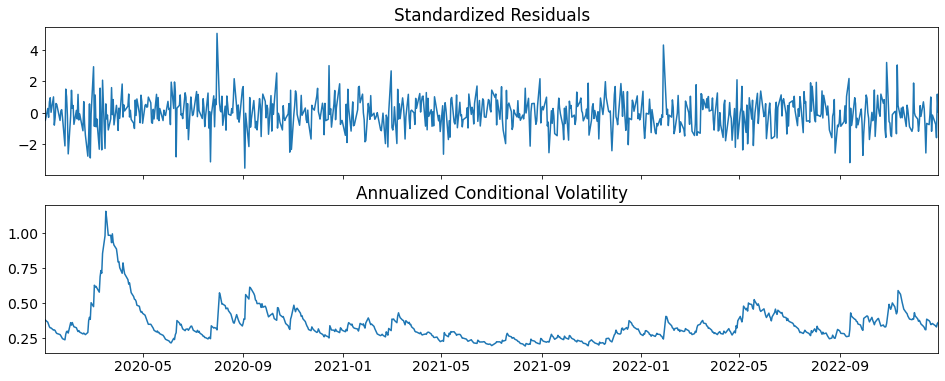

In [28]:
fig = res.plot('D')

In [ ]:
# get the variance forecast
forecast = res.forecast(horizon=1, reindex=False)
variance_forecast = forecast.variance.iloc[-1][0]